In [14]:
import numpy as np
import pandas as pd
import math

pd.set_option('display.max_rows', 80)

import random
import time
import pickle

import sys
sys.path.append("../../")

from src.utils import create_all_member
from src.print_result import print_player

import matplotlib.pyplot as plt

from config.formation import *
from config.config import *

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

In [3]:
with open('../../data/pickle/20230222v2_50y.pickle', mode='rb') as f:
    ws = pickle.load(f)

In [4]:
output = pd.DataFrame()

for c in ws.country_leagues:
    output = pd.concat([output, c.players_result])

output = pd.concat([output, ws.players_result])
output = output.sort_values("年度")
ws.players_result = output
end_year = 2050

In [5]:
all_member = create_all_member(ws, end_year)

## Rateの分布

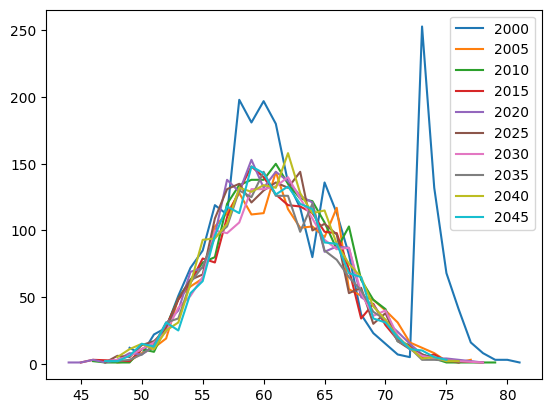

In [8]:
output = ws.players_result
for i in range(2000, end_year, 5):
    output_ = output[((output["年度"]==i)&(output["年齢"]==18))]
    rate_list = output_["Rate"].unique()
    rate_list.sort()
    rate_num = []
    for rate in rate_list:
        rate_num.append(len(output_.groupby("Rate").get_group(rate).groupby("uuid").mean()))
    plt.plot(rate_list, rate_num, label=i)
plt.legend()
plt.show()

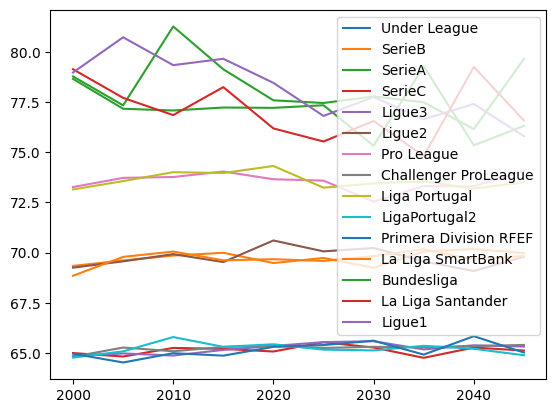

In [10]:
output = ws.players_result
league_list = output["リーグ"].unique()

x = np.arange(2000, end_year, 5)

for name in league_list[:15]:
    y = []
    for year in range(2000, end_year, 5):
        output_ = output[((output["リーグ"]==name)&(output["年度"]==year)&(output["出場時間"]>38*90*0.7))]
        y.append(output_["Rate"].mean())
    plt.plot(x, y, label=name)
plt.legend()
plt.show()

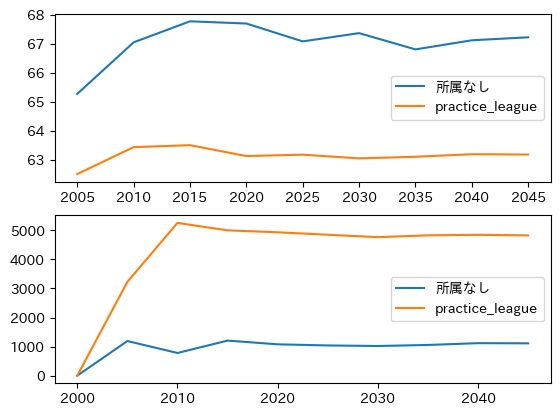

In [15]:
output = ws.players_result
league_list = ["所属なし", "practice_league"]

plt.subplot(2,1,1)
for name in league_list:
    y = []
    for year in range(2000, end_year, 5):
        output_ = output[((output["リーグ"]==name)&(output["年度"]==year))]
        y.append(output_["Rate"].mean())
    plt.plot(x, y, label=name)
plt.legend()

plt.subplot(2,1,2)
for name in league_list:
    y = []
    for year in range(2000, end_year,5):
        output_ = output[((output["リーグ"]==name)&(output["年度"]==year))]
        y.append(len(output_))
    plt.plot(x, y, label=name)
plt.legend()
plt.show()

## ポジションごとのrate

In [16]:
output.groupby("ポジション")["Rate"].describe()

,count,mean,std,min,25%,50%,75%,max
ポジション,,,,,,,,
CAM,76936.0,61.873375,6.348969,44.0,57.0,61.0,66.0,94.0
CB,164896.0,67.110573,6.711733,44.0,62.0,66.0,72.0,95.0
CDM,71135.0,64.864624,6.861277,44.0,60.0,64.0,70.0,89.0
CM,164796.0,65.989678,6.852878,43.0,61.0,65.0,71.0,92.0
GK,143910.0,66.328837,6.744123,45.0,61.0,66.0,71.0,96.0
LB,91199.0,68.885997,5.754969,49.0,65.0,68.0,73.0,89.0
LM,57743.0,67.820151,6.120930,46.0,63.0,67.0,73.0,92.0
LW,64938.0,66.173119,6.153737,47.0,62.0,65.0,70.0,89.0
LWB,11267.0,67.094346,5.110623,47.0,64.0,67.0,71.0,84.0


## 年代別

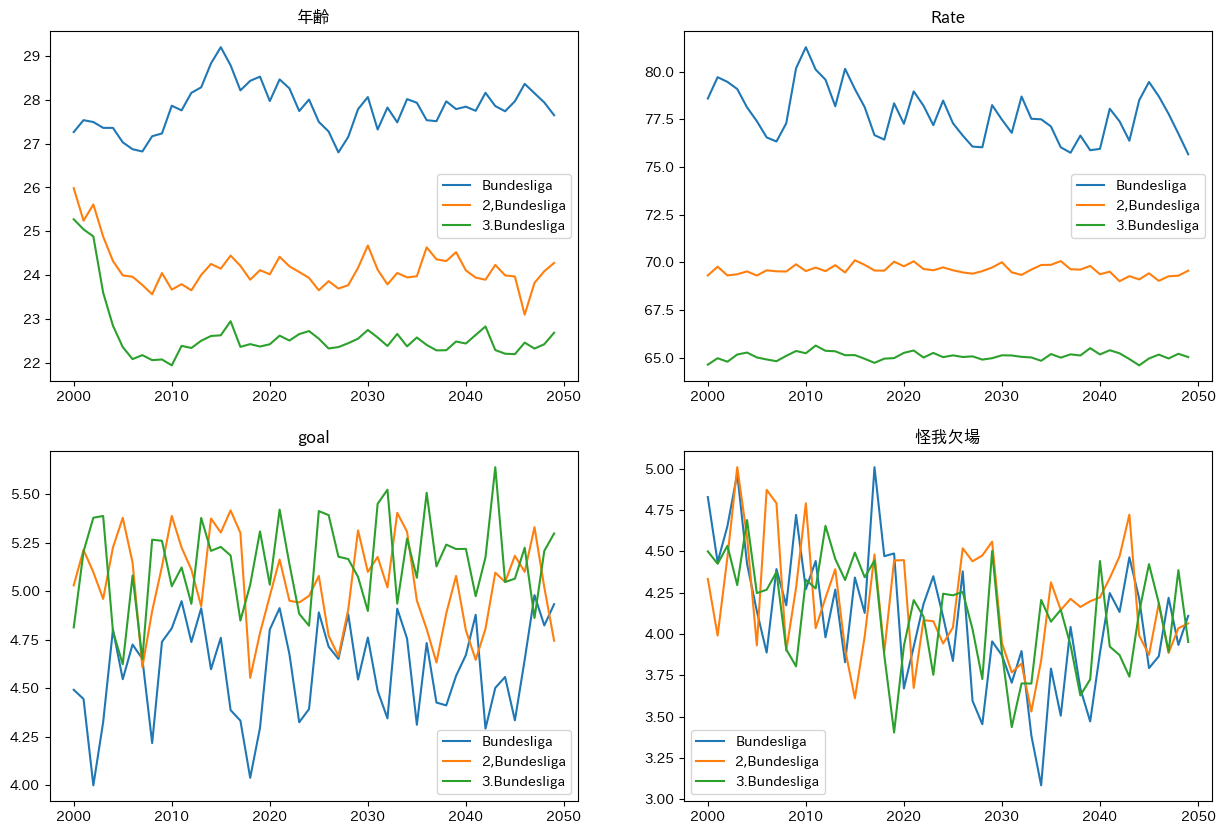

In [17]:
columns = ["年齢", "Rate", "goal", "怪我欠場"]
plt.figure(figsize=(15, 10))
for i, cl in enumerate(columns):
    plt.subplot(2, 2, i+1)
    country = ws.country_leagues[2]
    for league_num in range(3):
        output_ = output[output["リーグ"]==country.leagues[league_num].name]
        output_ = output_[output_["出場時間"]>2000]
        plt.plot([y for y in range(2000, end_year)], output_.groupby("年度")[cl].describe()["mean"], label=country.leagues[league_num].name)
    #output_ = output[output["リーグ"]=="rental_league"]
    #plt.plot([y for y in range(2000, end_year)], output_.groupby("年度")[cl].describe()["mean"], label="rental_league")
    plt.title(cl)
    plt.legend()

In [18]:
output = ws.players_result
output_ = output[output["Rate"]>83]
for year in range(2000, end_year, 5):
    _output_ = output_[((output_["年度"]==year)&(output_["分類"]=="リーグ"))]
    print(year)
    display(_output_.groupby("Rate").count())

2000


,名前,uuid,年齢,残契約,ポジション,リーグ,リーグレベル,年度,国,チーム,...,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数
Rate,,,,,,,,,,,,,,,,,,,,,
84,36,36,36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36
85,23,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23
86,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
87,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
88,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
89,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
90,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
91,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
92,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


2005


,名前,uuid,年齢,残契約,ポジション,リーグ,リーグレベル,年度,国,チーム,...,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数
Rate,,,,,,,,,,,,,,,,,,,,,
84,44,44,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44
85,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
86,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
87,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
88,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
89,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
90,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
92,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


2010


,名前,uuid,年齢,残契約,ポジション,リーグ,リーグレベル,年度,国,チーム,...,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数
Rate,,,,,,,,,,,,,,,,,,,,,
84,49,49,49,49,49,49,49,49,49,49,...,49,49,49,49,49,49,49,49,49,49
85,35,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
86,23,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23
87,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
88,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
89,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
90,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
91,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
92,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


2015


,名前,uuid,年齢,残契約,ポジション,リーグ,リーグレベル,年度,国,チーム,...,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数
Rate,,,,,,,,,,,,,,,,,,,,,
84,37,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37
85,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
86,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
87,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
88,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
89,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
90,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
91,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


2020


,名前,uuid,年齢,残契約,ポジション,リーグ,リーグレベル,年度,国,チーム,...,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数
Rate,,,,,,,,,,,,,,,,,,,,,
84,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
85,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
86,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
87,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
88,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
89,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
91,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


2025


,名前,uuid,年齢,残契約,ポジション,リーグ,リーグレベル,年度,国,チーム,...,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数
Rate,,,,,,,,,,,,,,,,,,,,,
84,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
85,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
86,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
87,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
88,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
89,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
90,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
92,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
94,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


2030


,名前,uuid,年齢,残契約,ポジション,リーグ,リーグレベル,年度,国,チーム,...,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数
Rate,,,,,,,,,,,,,,,,,,,,,
84,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
85,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
86,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
87,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
88,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
89,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
93,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
96,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


2035


,名前,uuid,年齢,残契約,ポジション,リーグ,リーグレベル,年度,国,チーム,...,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数
Rate,,,,,,,,,,,,,,,,,,,,,
84,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
85,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
86,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
87,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
88,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
89,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
90,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
91,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
92,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


2040


,名前,uuid,年齢,残契約,ポジション,リーグ,リーグレベル,年度,国,チーム,...,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数
Rate,,,,,,,,,,,,,,,,,,,,,
84,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
85,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
86,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
87,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
88,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
90,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
91,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
92,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
93,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


2045


,名前,uuid,年齢,残契約,ポジション,リーグ,リーグレベル,年度,国,チーム,...,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数
Rate,,,,,,,,,,,,,,,,,,,,,
84,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
85,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
86,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
87,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
88,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
89,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
90,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
91,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [11]:
for year in range(2000, end_year, 10):
    output_ = output[((output["年度"]>=year))]
    output_ = output_[output_["年度"]<year+10]
    display(output_.groupby("ポジション")["Rate"].describe())

,count,mean,std,min,25%,50%,75%,max
ポジション,,,,,,,,
CAM,11875.0,69.169600,5.518359,51.0,66.0,69.0,72.0,94.0
CB,37923.0,72.598555,5.630666,51.0,69.0,72.0,76.0,90.0
CDM,13298.0,71.120770,5.290679,49.0,68.0,71.0,75.0,88.0
CM,33871.0,72.147678,5.587068,51.0,69.0,72.0,76.0,90.0
GK,31719.0,70.687474,5.680739,43.0,68.0,71.0,74.0,88.0
LB,16368.0,73.359971,4.576893,53.0,71.0,73.0,76.0,88.0
LM,11691.0,73.343769,4.568061,53.0,70.0,73.0,76.0,88.0
LW,11264.0,72.079812,5.479213,50.0,69.0,72.0,76.0,89.0
LWB,1498.0,71.761682,4.313215,53.0,69.0,72.0,75.0,86.0


,count,mean,std,min,25%,50%,75%,max
ポジション,,,,,,,,
CAM,13206.0,71.014690,5.350758,53.0,68.0,71.0,75.0,88.0
CB,33371.0,74.766054,4.958167,53.0,72.0,75.0,78.0,91.0
CDM,13560.0,73.123378,5.149728,53.0,70.0,73.0,76.0,88.0
CM,32112.0,75.048860,5.162871,54.0,72.0,75.0,78.0,94.0
GK,30884.0,73.773475,5.255882,53.0,71.0,74.0,77.0,92.0
LB,18771.0,75.046987,4.579451,57.0,72.0,75.0,78.0,89.0
LM,11704.0,75.247266,4.055818,54.0,72.0,75.0,78.0,89.0
LW,11516.0,74.597256,5.479762,54.0,71.0,75.0,78.0,90.0
LWB,2211.0,73.986431,4.448071,58.0,71.0,74.0,77.0,85.0


,count,mean,std,min,25%,50%,75%,max
ポジション,,,,,,,,
CAM,13474.0,70.114962,4.844045,53.0,68.0,70.0,73.0,92.0
CB,33263.0,73.898867,4.639528,56.0,71.0,74.0,77.0,92.0
CDM,14160.0,72.284181,4.691172,53.0,70.0,72.0,75.0,87.0
CM,32329.0,74.061864,4.835350,54.0,71.0,74.0,77.0,90.0
GK,31312.0,72.645791,4.602588,52.0,71.0,73.0,75.0,90.0
LB,19127.0,74.528102,4.206270,56.0,72.0,75.0,77.0,87.0
LM,11833.0,74.184569,3.665148,54.0,72.0,74.0,76.0,89.0
LW,10988.0,73.327539,5.130571,53.0,70.0,73.0,77.0,89.0
LWB,2079.0,73.144781,4.267940,58.0,71.0,73.0,76.0,87.0


## 18歳のRate

In [19]:
output[output["年齢"]==18]["Rate"].value_counts().sort_index()

43       2
44       3
45       6
46      31
47      56
48     118
49     245
50     482
51     847
52    1508
53    2220
54    3279
55    4267
56    5711
57    6969
58    8468
59    8977
60    9355
61    9546
62    9312
63    8730
64    8226
65    7216
66    6259
67    5300
68    4393
69    3221
70    2565
71    1597
72    1015
73     901
74     564
75     323
76     184
77      86
78      52
79      12
80       6
81       2
Name: Rate, dtype: int64

## 怪我割合

In [13]:
print(output["怪我欠場"].sum()/13/20/(end_year-2000))
print(output[output["試合数"]>0]["怪我欠場"].value_counts())

181.11602564102566
0     389690
1      27042
2      13851
3      13185
4      12109
5      11144
6      10012
7       9067
8       8394
9       7552
10      6923
11      6363
12      5557
13      5041
14      4411
15      3786
16      3593
17      3092
18      2704
19      2366
20      2065
21      1737
22      1540
23      1328
24      1174
25       980
26       868
27       704
28       621
29       481
30       444
32       377
31       363
33       219
34       200
35       150
36       128
37        95
38         9
Name: 怪我欠場, dtype: int64


## 90以上の人数

In [14]:
output[output["Rate"]>95].groupby("uuid").mean()

,年齢,Rate,残契約,年度,試合数,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数
uuid,,,,,,,,,,,,,


In [44]:
ws.country_leagues[0].leagues[0].teams[2].rank_point_list

[11, 18, 33, 38, 54, 66, 79, 88, 92, 100, 108, 112, 119, 125, 127, 129, 132]

### チーム得点

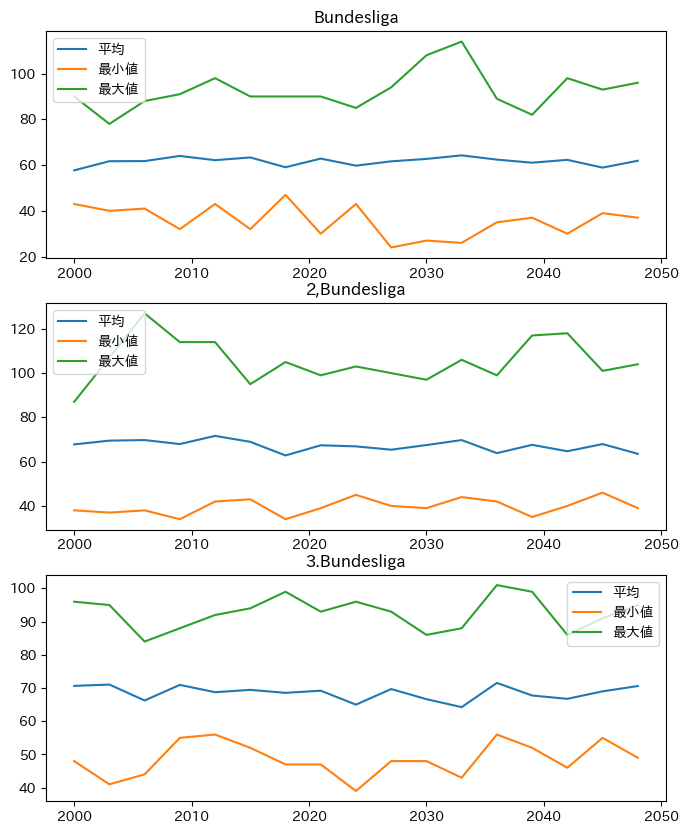

In [22]:
figure = plt.figure(figsize=(8, 10))
country = ws.country_leagues[2]
for league_num in range(3):
    me = []
    mi = []
    ma = []
    st = []
    for year in range(2000, end_year, 3):
        output_ = country.leagues[league_num].team_result[f"{country.leagues[league_num].name}_{year}"]
        me.append(output_["得点"].mean())
        mi.append(output_["得点"].min())
        ma.append(output_["得点"].max())
        st.append(output_["得点"].std())
        x = [y for y in range(2000, end_year, 3)]
    plt.subplot(3, 1, league_num+1)
    plt.plot(x, me, label="平均")
    plt.plot(x, mi, label="最小値")
    plt.plot(x, ma, label="最大値")
    #plt.plot(x, st, label="標準偏差")
    plt.title(f"{country.leagues[league_num].name}")
    plt.legend()
plt.show()

### 勝ち点

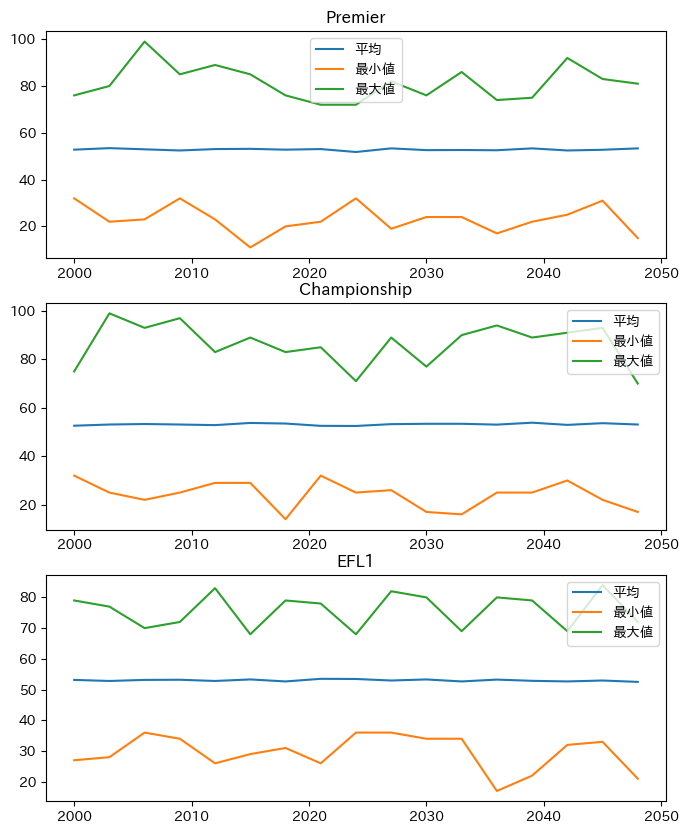

In [23]:
figure = plt.figure(figsize=(8, 10))
country = ws.country_leagues[0]
for league_num in range(3):
    me = []
    mi = []
    ma = []
    st = []
    for year in range(2000, end_year, 3):
        output_ = country.leagues[league_num].team_result[f"{country.leagues[league_num].name}_{year}"]
        me.append(output_["Points"].mean())
        mi.append(output_["Points"].min())
        ma.append(output_["Points"].max())
        x = [y for y in range(2000, end_year, 3)]
    plt.subplot(3, 1, league_num+1)
    plt.plot(x, me, label="平均")
    plt.plot(x, mi, label="最小値")
    plt.plot(x, ma, label="最大値")
    #plt.plot(x, st, label="標準偏差")
    plt.title(f"{country.leagues[league_num].name}")
    plt.legend()
plt.show()

## 引退年齢

In [24]:
all_member[(all_member["進退"]=="引退")].value_counts("年齢").sort_index()

年齢
24       27
25       48
26      779
27      819
28     1224
29     1343
30     1320
31     1325
32     1472
33     1467
34     1519
35     1740
36     1646
37     1687
38     1748
39     1727
40     1710
41     1850
42     1714
43     1695
44     1810
45     1699
46     1831
47     1697
48     1628
49     1863
50     1791
51     1723
52     1759
53     1789
54     1753
55     1760
56     1706
57     1798
58     1738
59     1870
60     1851
61     1752
62     1815
63     1983
64     1728
65     2039
66     2044
67     1144
68    12214
69       58
70       99
71      148
72      174
73      181
74      155
75      116
76       60
77       30
78        5
dtype: int64

## 成長タイプ

In [38]:
all_member["成長タイプ"].value_counts()

general    20359
grass       6915
genius      1724
legend       233
Name: 成長タイプ, dtype: int64

In [20]:
all_member[all_member["成長タイプ"]=="legend"].sort_values("年齢", ascending=False)

,名前,uuid,年齢,生まれ年,Rate,成長タイプ,リーグ,チーム,進退
13185,Vicent,da5223e2-64ba-11ed-a018-975f99737111,57,1973,44,legend,引退,引退,引退
15379,Keir,e7863148-64ba-11ed-a018-975f99737111,54,1976,66,legend,引退,引退,引退
13217,Jakel,e62fec76-64ba-11ed-a018-975f99737111,54,1976,56,legend,引退,引退,引退
16265,Buren,d9062178-64ba-11ed-a018-975f99737111,54,1976,63,legend,引退,引退,引退
15651,Olan,df3a2ed6-64ba-11ed-a018-975f99737111,53,1977,65,legend,引退,引退,引退
...,...,...,...,...,...,...,...,...,...
2438,Boone,98ac79f0-64ca-11ed-a018-975f99737111,18,2011,68,legend,La Liga Santander,Girona,現役
10127,Espn,98ebee32-64ca-11ed-a018-975f99737111,18,2011,66,legend,Liga Portugal,Penafiel,現役
900,Delshawn,98a0a076-64ca-11ed-a018-975f99737111,18,2011,63,legend,Championship,Middlesbrough,現役
1093,Vicent,98a1161e-64ca-11ed-a018-975f99737111,18,2011,63,legend,Championship,Cardiff,現役


In [21]:
buff = output[output["分類"]=="レンタルリーグ"]
buff[buff["Rate"]>80].head(20)

,名前,uuid,年齢,Rate,残契約,ポジション,リーグ,年度,国,チーム,...,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数


## レンタル選手

In [22]:
output[output["レンタル元"]!=""]["Rate"].value_counts().sort_index()

60        2
61        4
62       24
63      102
64      194
65      240
66      344
67      562
68     1100
69     2570
70     6282
71    12130
72    14492
73    14196
74    11254
75     2700
76     1506
77      658
78      226
79      154
80       46
81       12
82        4
83        2
Name: Rate, dtype: int64

In [23]:
output[output["レンタル元"]!=""]["年齢"].value_counts().sort_index()

19    15948
20    17042
21    14862
22    12134
23     2534
24      438
25      518
26      548
27      670
28      572
29      618
30      546
31      566
32      564
33      452
34      330
35      296
36      116
37       34
38       16
Name: 年齢, dtype: int64

In [24]:
p = search_player(England, all_member, uuid_)

NameError: name 'England' is not defined

In [ ]:
uuid_ = "04c218dc-4b00-11ed-a99e-00155d479737"
print_player(England, all_member, uuid_)

In [ ]:
p.shooting_initial

In [ ]:
output